# Prepare 2-shot prompt dataset

In [ ]:
import pandas as pd

# Load the training and test data
train_texts_df = pd.read_csv('train_texts.csv')
train_labels_df = pd.read_csv('train_labels.csv')
test_texts_df = pd.read_csv('test_texts.csv')
test_labels_df = pd.read_csv('test_labels.csv')

In [ ]:
# Modified code to create a list of prompts, each with different 2 samples for each test text
def create_individual_prompts(train_texts, train_labels, test_texts, task_description="Classify the following text into one of the categories: Home, Extended Care, Expired. Answer in 1 single word."):
    prompts = []
    unique_labels = train_labels['label'].unique()

    for i in range(len(test_texts)):
        selected_samples = []
        for label in unique_labels[:2]:  # Select two samples from different classes
            sample = train_texts[train_labels['label'] == label].sample(1).iloc[0]
            selected_samples.append((sample['text'], label))

        # Creating individual prompt for each test text
        prompt = ''
        for text, label in selected_samples:
            prompt += f"Text: {text}\nLabel: {label}\n\n"
        prompt += task_description + "\n\n"
        prompt += f"Text: {test_texts.iloc[i]['text']}\nLabel: "
        prompts.append(prompt)

    return prompts

# Generating prompts for each test text
individual_prompts = create_individual_prompts(train_texts_df, train_labels_df, test_texts_df)

In [ ]:
# Display the first prompt as an example
individual_prompts[2]

'Text: allergies is penicillins . chief complaint is hypotension, fevers . major surgical or invasive procedure is none . physical exam is none . brief hospital course is none\nLabel: Extended Care\n\nText: allergies is no known allergies / adverse drug reactions . chief complaint is cardiac arrest . major surgical or invasive procedure is icd placement device brand/name af mri vr dvfb1d4 model number lead model sprint mri, mr yes, lead position rv, lead length 62 cm, manufacturer , serial number , implant date . physical exam is admission physical ================== general well developed, well nourished in nad heent nc/at sclera anicteric perrl eomi neck supple no jvp at 30 degrees cardiac normal rate, regular rhythm no murmurs, rubs, or gallops lungs no chest wall deformities or tenderness respiration is unlabored with no accessory muscle use no adventitious breath sounds abdomen soft, ntnd +bs extremities cool, no edema skin no significant skin lesions or rashes pulses distal pulse

# GPT 3.5 2-shot

In [ ]:
import requests
import time

# Your GPT API key
api_key = ''

# The API endpoint URL
api_url = 'https://api.openai.com/v1/chat/completions'

# The headers including the API key
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Bearer {api_key}'
}

def query_gpt3(prompt):
    data = {
        "model": "gpt-3.5-turbo-1106",  # Specify the model
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    }

    retries = 10  # Maximum number of retries for unknown errors
    attempt = 0

    while attempt < retries:
        response = requests.post(api_url, headers=headers, json=data)
        if response.status_code == 200:
            # Extract the content from the last message from the assistant
            messages = response.json().get('choices', [{}])[0].get('message', {}).get('content', '')
            return messages.strip()
        elif response.status_code == 429:  # Rate limit exceeded
            print("Rate limit reached, waiting to retry...")
            time.sleep(30)  # Wait 30 seconds before retrying
        else:
            print(f"Error in API call: {response.status_code}")
            print(response.text)
            time.sleep(5)  # Wait 5 seconds before retrying for unknown errors
            attempt += 1

    print("Max retries reached, request failed.")
    return None

In [ ]:
# Test the function with an example prompt
example_prompt = individual_prompts[148]  # Replace with an actual prompt
gpt_output_test = query_gpt3(example_prompt)

print(gpt_output_test)

Extended Care


In [ ]:
test_labels_df['label'][148]

'Extended Care'

In [ ]:
import requests
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from tqdm import tqdm

# Predict labels using GPT for each prompt and compare with actual labels
predicted_labels = []
for prompt in tqdm(individual_prompts, desc="Processing prompts"):
    gpt_output = query_gpt3(prompt)
    predicted_labels.append(gpt_output)

Processing prompts:   8%|▊         | 90/1200 [01:00<11:58,  1.54it/s]

Rate limit reached, waiting to retry...


Processing prompts:  12%|█▏        | 138/1200 [02:04<09:49,  1.80it/s]

Rate limit reached, waiting to retry...


Processing prompts:  17%|█▋        | 199/1200 [03:16<10:52,  1.53it/s]

Rate limit reached, waiting to retry...


Processing prompts:  21%|██        | 252/1200 [04:23<11:58,  1.32it/s]

Rate limit reached, waiting to retry...


Processing prompts:  25%|██▌       | 305/1200 [05:30<10:08,  1.47it/s]

Rate limit reached, waiting to retry...


Processing prompts:  30%|██▉       | 357/1200 [06:33<09:51,  1.42it/s]

Rate limit reached, waiting to retry...


Processing prompts:  34%|███▍      | 406/1200 [07:35<06:33,  2.02it/s]

Rate limit reached, waiting to retry...


Processing prompts:  38%|███▊      | 450/1200 [08:32<07:04,  1.76it/s]

Rate limit reached, waiting to retry...


Processing prompts:  41%|████      | 487/1200 [09:26<06:53,  1.72it/s]

Rate limit reached, waiting to retry...


Processing prompts:  46%|████▌     | 548/1200 [10:35<07:59,  1.36it/s]

Rate limit reached, waiting to retry...


Processing prompts:  49%|████▉     | 585/1200 [11:28<05:35,  1.83it/s]

Rate limit reached, waiting to retry...


Processing prompts:  52%|█████▏    | 622/1200 [12:24<06:33,  1.47it/s]

Rate limit reached, waiting to retry...


Processing prompts:  55%|█████▍    | 659/1200 [13:17<05:07,  1.76it/s]

Rate limit reached, waiting to retry...


Processing prompts:  60%|█████▉    | 716/1200 [14:29<04:03,  1.99it/s]

Rate limit reached, waiting to retry...


Processing prompts:  62%|██████▏   | 748/1200 [15:17<03:32,  2.13it/s]

Rate limit reached, waiting to retry...


Processing prompts:  67%|██████▋   | 807/1200 [16:27<04:01,  1.63it/s]

Rate limit reached, waiting to retry...


Processing prompts:  70%|███████   | 844/1200 [17:19<02:56,  2.02it/s]

Rate limit reached, waiting to retry...


Processing prompts:  74%|███████▎  | 882/1200 [18:14<03:11,  1.66it/s]

Rate limit reached, waiting to retry...


Processing prompts:  77%|███████▋  | 919/1200 [19:06<02:37,  1.78it/s]

Rate limit reached, waiting to retry...


Processing prompts:  84%|████████▍ | 1005/1200 [21:01<01:52,  1.73it/s]

Rate limit reached, waiting to retry...


Processing prompts:  91%|█████████ | 1094/1200 [23:18<01:00,  1.74it/s]

Rate limit reached, waiting to retry...


Processing prompts:  94%|█████████▍| 1132/1200 [24:08<00:38,  1.77it/s]

Rate limit reached, waiting to retry...


Processing prompts:  98%|█████████▊| 1175/1200 [25:07<00:12,  2.00it/s]

Rate limit reached, waiting to retry...


Processing prompts: 100%|██████████| 1200/1200 [25:51<00:00,  1.29s/it]


In [ ]:
set(predicted_labels)

{'Expired', 'Extended Care', 'Home'}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import re

# Function to process predictions
def process_predictions(actual_labels, predicted_labels):
    processed_predictions = []
    for actual, predicted in zip(actual_labels, predicted_labels):
      if re.search(r'\bhome\b', predicted, re.IGNORECASE):
        processed_predictions.append('Home')
      elif re.search(r'\bextended care\b', predicted, re.IGNORECASE):
        processed_predictions.append('Extended Care')
      elif re.search(r'\bexpired\b', predicted, re.IGNORECASE) or re.search(r'\bexpried\b', predicted, re.IGNORECASE):
        processed_predictions.append('Expired')
      else:
        # Append a default label or a label indicating incorrect prediction
        processed_predictions.append('Insufficient')
    return processed_predictions

In [ ]:
# Process the predictions
processed_predictions_gpt3 = process_predictions(list(test_labels_df['label']), predicted_labels)

In [ ]:
# Encode labels for metric calculations
le_gpt3 = LabelEncoder()
le_gpt3.fit(processed_predictions_gpt3)

encoded_actual_labels_gpt3 = le_gpt3.transform(list(test_labels_df['label']))
encoded_predicted_labels_gpt3 = le_gpt3.transform(processed_predictions_gpt3)

In [ ]:
# Function to calculate metrics
def calculate_metrics(actual_labels, predicted_labels):
    cm = confusion_matrix(actual_labels, predicted_labels)
    accuracy = accuracy_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels, average='weighted')
    recall = recall_score(actual_labels, predicted_labels, average='weighted')
    precision = precision_score(actual_labels, predicted_labels, average='weighted')

    return cm, accuracy, f1, recall, precision

In [ ]:
# Calculate metrics
cm_gpt3 = confusion_matrix(encoded_actual_labels_gpt3, encoded_predicted_labels_gpt3)
accuracy_gpt3 = accuracy_score(encoded_actual_labels_gpt3, encoded_predicted_labels_gpt3)
f1_gpt3 = f1_score(encoded_actual_labels_gpt3, encoded_predicted_labels_gpt3, average='weighted')
recall_gpt3 = recall_score(encoded_actual_labels_gpt3, encoded_predicted_labels_gpt3, average='weighted')
precision_gpt3 = precision_score(encoded_actual_labels_gpt3, encoded_predicted_labels_gpt3, average='weighted')

# Print metrics and confusion matrix
print("GPT 3 Confusion Matrix:\n", cm_gpt3)
print("GPT 3 Accuracy:", accuracy_gpt3)
print("GPT 3 F1 Score:", f1_gpt3)
print("GPT 3 Recall:", recall_gpt3)
print("GPT 3 Precision:", precision_gpt3)

GPT 3 Confusion Matrix:
 [[264  52   1]
 [ 38 474  81]
 [ 11 191  88]]
GPT 3 Accuracy: 0.6883333333333334
GPT 3 F1 Score: 0.6714712805356682
GPT 3 Recall: 0.6883333333333334
GPT 3 Precision: 0.6745971279818891


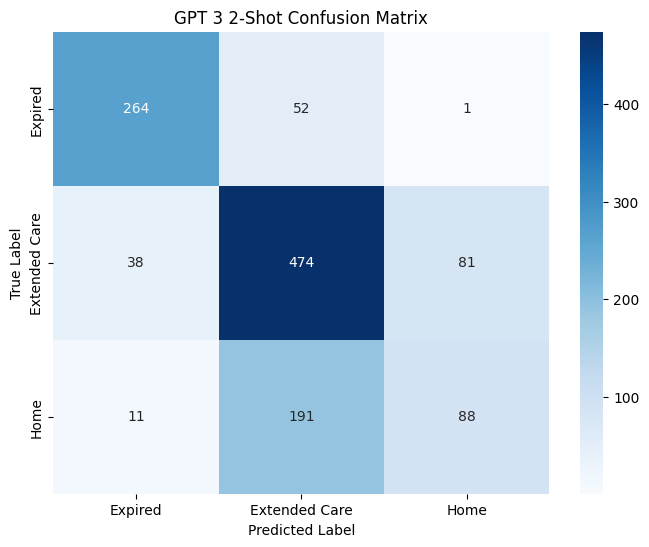

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix_gpt3(cm, labels, title='GPT 3 2-Shot Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Extracting the unique labels
unique_labels_gpt3 = le_gpt3.classes_

# Plot the confusion matrix
plot_confusion_matrix_gpt3(cm_gpt3, unique_labels_gpt3)

# Prepare 3-shot prompt dataset

In [ ]:
def create_individual_prompts_3_shot(train_texts, train_labels, test_texts, task_description="Classify the following text into one of the categories: Home, Extended Care, Expired. Answer in 1 single word."):
    prompts = []
    unique_labels = train_labels['label'].unique()

    for i in range(len(test_texts)):
        selected_samples = []
        for label in unique_labels[:3]:  # Select four samples from different classes
            sample = train_texts[train_labels['label'] == label].sample(1).iloc[0]
            selected_samples.append((sample['text'], label))

        # Creating individual prompt for each test text
        prompt = ''
        for text, label in selected_samples:
            prompt += f"Text: {text}\nLabel: {label}\n\n"
        prompt += task_description + "\n\n"
        prompt += f"Text: {test_texts.iloc[i]['text']}\nLabel: "
        prompts.append(prompt)

    return prompts

# Generating prompts for each test text
individual_prompt_3_shot = create_individual_prompts_3_shot(train_texts_df, train_labels_df, test_texts_df)


In [ ]:
individual_prompt_3_shot[1]

"Text: allergies is amoxicillin . chief complaint is chest pain, suicidal ideation . major surgical or invasive procedure is none . physical exam is none . brief hospital course is none\nLabel: Extended Care\n\nText: allergies is no known allergies / adverse drug reactions . chief complaint is abdominal pain . major surgical or invasive procedure is none . physical exam is none . brief hospital course is h/o mgus and htn presents w/ acute onset left upper quadrant pain ct with ?sbo ?colitis 1 left abdominal pain -ct abdomen with differential including sbo vs colitis but overall not convincing differentials she does have history of previous abdominal surgeries, as risk factor to sbo, and also diverticulosis, as risk factor to diverticulitis she was started on po antibiotics, iv fluids, and bowel rest with improvement and then complete resolution of her pain her diet was advanced, which she tolerated well she did have a bowel movement during admission and should continue with outpatient 

# GPT 3.5 3-shot

In [ ]:
# Test the function with an example prompt
example_prompt = individual_prompt_3_shot[148]  # Replace with an actual prompt
gpt_output_test = query_gpt3(example_prompt)

print(gpt_output_test)

Extended Care


In [ ]:
# Predict labels using GPT for each prompt and compare with actual labels
predicted_labels_gpt3_3_shot = []
for prompt in tqdm(individual_prompt_3_shot, desc="Processing prompts"):
    gpt_output = query_gpt3(prompt)
    predicted_labels_gpt3_3_shot.append(gpt_output)

Processing prompts:   4%|▎         | 42/1200 [00:21<08:47,  2.19it/s]

Rate limit reached, waiting to retry...


Processing prompts:   5%|▌         | 65/1200 [01:02<08:49,  2.14it/s]

Rate limit reached, waiting to retry...


Processing prompts:   7%|▋         | 89/1200 [01:45<09:54,  1.87it/s]

Rate limit reached, waiting to retry...


Processing prompts:   9%|▉         | 113/1200 [02:30<11:25,  1.59it/s]

Rate limit reached, waiting to retry...


Processing prompts:  11%|█▏        | 136/1200 [03:11<07:37,  2.32it/s]

Rate limit reached, waiting to retry...


Processing prompts:  13%|█▎        | 157/1200 [03:51<09:35,  1.81it/s]

Rate limit reached, waiting to retry...


Processing prompts:  15%|█▌        | 182/1200 [04:33<07:03,  2.41it/s]

Rate limit reached, waiting to retry...


Processing prompts:  17%|█▋        | 205/1200 [05:14<06:55,  2.40it/s]

Rate limit reached, waiting to retry...


Processing prompts:  19%|█▉        | 230/1200 [05:56<09:02,  1.79it/s]

Rate limit reached, waiting to retry...


Processing prompts:  21%|██        | 254/1200 [06:37<07:06,  2.22it/s]

Rate limit reached, waiting to retry...


Processing prompts:  23%|██▎       | 280/1200 [07:20<08:22,  1.83it/s]

Rate limit reached, waiting to retry...


Processing prompts:  25%|██▌       | 304/1200 [08:02<07:19,  2.04it/s]

Rate limit reached, waiting to retry...


Processing prompts:  27%|██▋       | 329/1200 [08:44<07:37,  1.91it/s]

Rate limit reached, waiting to retry...


Processing prompts:  29%|██▉       | 350/1200 [09:24<07:20,  1.93it/s]

Rate limit reached, waiting to retry...


Processing prompts:  31%|███▏      | 375/1200 [10:06<06:21,  2.16it/s]

Rate limit reached, waiting to retry...


Processing prompts:  33%|███▎      | 399/1200 [10:48<05:53,  2.26it/s]

Rate limit reached, waiting to retry...


Processing prompts:  37%|███▋      | 442/1200 [12:06<05:58,  2.11it/s]

Rate limit reached, waiting to retry...


Processing prompts:  38%|███▊      | 462/1200 [12:46<06:55,  1.78it/s]

Rate limit reached, waiting to retry...


Processing prompts:  40%|████      | 485/1200 [13:28<06:21,  1.87it/s]

Rate limit reached, waiting to retry...


Processing prompts:  42%|████▏     | 509/1200 [14:09<05:30,  2.09it/s]

Rate limit reached, waiting to retry...


Processing prompts:  45%|████▍     | 536/1200 [14:52<05:00,  2.21it/s]

Rate limit reached, waiting to retry...


Processing prompts:  46%|████▋     | 558/1200 [15:32<05:01,  2.13it/s]

Rate limit reached, waiting to retry...


Processing prompts:  48%|████▊     | 579/1200 [16:14<05:33,  1.86it/s]

Rate limit reached, waiting to retry...


Processing prompts:  50%|████▉     | 599/1200 [16:54<04:41,  2.13it/s]

Rate limit reached, waiting to retry...


Processing prompts:  52%|█████▏    | 621/1200 [17:36<05:04,  1.90it/s]

Rate limit reached, waiting to retry...


Processing prompts:  54%|█████▍    | 645/1200 [18:19<04:10,  2.21it/s]

Rate limit reached, waiting to retry...


Processing prompts:  56%|█████▌    | 666/1200 [19:00<04:09,  2.14it/s]

Rate limit reached, waiting to retry...


Processing prompts:  58%|█████▊    | 691/1200 [19:41<03:37,  2.34it/s]

Rate limit reached, waiting to retry...


Processing prompts:  60%|█████▉    | 717/1200 [20:25<04:03,  1.98it/s]

Rate limit reached, waiting to retry...


Processing prompts:  62%|██████▏   | 740/1200 [21:08<03:36,  2.12it/s]

Rate limit reached, waiting to retry...


Processing prompts:  64%|██████▎   | 762/1200 [21:49<03:36,  2.03it/s]

Rate limit reached, waiting to retry...


Processing prompts:  66%|██████▌   | 786/1200 [22:31<03:35,  1.92it/s]

Rate limit reached, waiting to retry...


Processing prompts:  68%|██████▊   | 811/1200 [23:13<03:12,  2.02it/s]

Rate limit reached, waiting to retry...


Processing prompts:  70%|██████▉   | 835/1200 [23:55<03:03,  1.99it/s]

Rate limit reached, waiting to retry...


Processing prompts:  71%|███████▏  | 855/1200 [24:35<02:34,  2.24it/s]

Rate limit reached, waiting to retry...


Processing prompts:  73%|███████▎  | 877/1200 [25:17<02:39,  2.02it/s]

Rate limit reached, waiting to retry...


Processing prompts:  75%|███████▍  | 899/1200 [25:58<02:22,  2.11it/s]

Rate limit reached, waiting to retry...


Processing prompts:  77%|███████▋  | 919/1200 [26:39<02:21,  1.99it/s]

Rate limit reached, waiting to retry...


Processing prompts:  79%|███████▊  | 943/1200 [27:20<02:07,  2.01it/s]

Rate limit reached, waiting to retry...


Processing prompts:  81%|████████  | 969/1200 [28:03<01:43,  2.24it/s]

Rate limit reached, waiting to retry...


Processing prompts:  83%|████████▎ | 992/1200 [28:45<02:05,  1.66it/s]

Rate limit reached, waiting to retry...


Processing prompts:  84%|████████▍ | 1014/1200 [29:27<01:42,  1.81it/s]

Rate limit reached, waiting to retry...


Processing prompts:  87%|████████▋ | 1045/1200 [30:21<01:29,  1.72it/s]

Rate limit reached, waiting to retry...


Processing prompts:  89%|████████▊ | 1064/1200 [31:00<01:02,  2.17it/s]

Rate limit reached, waiting to retry...


Processing prompts:  91%|█████████ | 1087/1200 [31:43<01:02,  1.82it/s]

Rate limit reached, waiting to retry...


Processing prompts:  92%|█████████▏| 1109/1200 [32:25<00:45,  1.99it/s]

Rate limit reached, waiting to retry...


Processing prompts:  94%|█████████▍| 1131/1200 [33:06<00:34,  1.98it/s]

Rate limit reached, waiting to retry...


Processing prompts:  96%|█████████▌| 1153/1200 [33:47<00:24,  1.93it/s]

Rate limit reached, waiting to retry...


Processing prompts:  98%|█████████▊| 1179/1200 [34:30<00:09,  2.18it/s]

Rate limit reached, waiting to retry...


Processing prompts: 100%|██████████| 1200/1200 [35:10<00:00,  1.76s/it]


In [ ]:
set(predicted_labels_gpt3_3_shot)

{'Expired', 'Extended Care', 'Extended Care.', 'Home'}

In [ ]:
# Process the predictions
processed_predictions_gpt3_3_shot = process_predictions(list(test_labels_df['label']), predicted_labels_gpt3_3_shot)

In [ ]:
set(processed_predictions_gpt3_3_shot )

{'Expired', 'Extended Care', 'Home'}

In [ ]:
# Encode labels for metric calculations
le_gpt3_3_shot = LabelEncoder()
le_gpt3_3_shot.fit(processed_predictions_gpt3_3_shot)

encoded_actual_labels_gpt3_3_shot = le_gpt3_3_shot.transform(list(test_labels_df['label']))
encoded_predicted_labels_gpt3_3_shot = le_gpt3_3_shot.transform(processed_predictions_gpt3_3_shot)

In [ ]:
# Calculate metrics
cm_gpt3_3_shot = confusion_matrix(encoded_actual_labels_gpt3_3_shot, encoded_predicted_labels_gpt3_3_shot)
accuracy_gpt3_3_shot = accuracy_score(encoded_actual_labels_gpt3_3_shot, encoded_predicted_labels_gpt3_3_shot)
f1_gpt3_3_shot = f1_score(encoded_actual_labels_gpt3_3_shot, encoded_predicted_labels_gpt3_3_shot, average='weighted')
recall_gpt3_3_shot = recall_score(encoded_actual_labels_gpt3_3_shot, encoded_predicted_labels_gpt3_3_shot, average='weighted')
precision_gpt3_3_shot = precision_score(encoded_actual_labels_gpt3_3_shot, encoded_predicted_labels_gpt3_3_shot, average='weighted')

# Print metrics and confusion matrix
print("GPT 3 3 shot Confusion Matrix:\n", cm_gpt3_3_shot)
print("GPT 3 3 shot Accuracy:", accuracy_gpt3_3_shot)
print("GPT 3 3 shot F1 Score:", f1_gpt3_3_shot)
print("GPT 3 3 shot Recall:", recall_gpt3_3_shot)
print("GPT 3 3 shot Precision:", precision_gpt3_3_shot)

GPT 3 3 shot Confusion Matrix:
 [[285  29   3]
 [ 75 405 113]
 [ 26 167  97]]
GPT 3 3 shot Accuracy: 0.6558333333333334
GPT 3 3 shot F1 Score: 0.6426353047903893
GPT 3 3 shot Recall: 0.6558333333333334
GPT 3 3 shot Precision: 0.6381075973913055


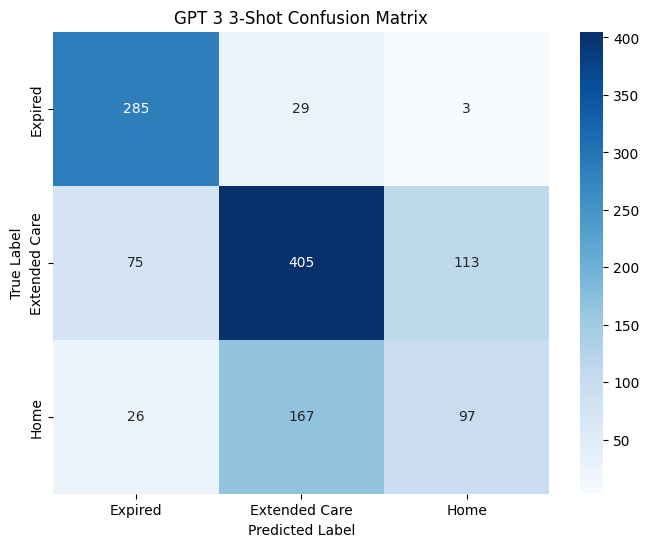

In [ ]:
# Extracting the unique labels
unique_labels_gpt3_3_shot = le_gpt3_3_shot.classes_

def plot_confusion_matrix_2(cm, labels, title='GPT 3 3-Shot Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Plot the confusion matrix
plot_confusion_matrix_2(cm_gpt3_3_shot, unique_labels_gpt3_3_shot)

# Prepare 0-shot prompt dataset

In [ ]:
def create_individual_prompts_0_shot(train_texts, train_labels, test_texts, task_description="Classify the following text into one of the categories: Home, Extended Care, Expired. Answer in 1 single word."):
    prompts = []
    unique_labels = train_labels['label'].unique()

    for i in range(len(test_texts)):
        # Creating individual prompt for each test text
        prompt = ''
        prompt += task_description + "\n\n"
        prompt += f"Text: {test_texts.iloc[i]['text']}\nLabel: "
        prompts.append(prompt)

    return prompts

# Generating prompts for each test text
individual_prompt_0_shot = create_individual_prompts_0_shot(train_texts_df, train_labels_df, test_texts_df)

In [ ]:
individual_prompt_0_shot[148]

'Classify the following text into one of the categories: Home, Extended Care, Expired. Answer in 1 single word.\n\nText: allergies is varenicline / lisinopril . chief complaint is pulmonary nodule . major surgical or invasive procedure is 1 right vats and wedge resection 2 mediastinal lymph node sampling . physical exam is gen nad cvrrr pulm nonlabored breathing on nasal cannula abd s, nt, nd . brief hospital course is patient underwent right video assisted thoracoscopic upper lobe wedge resection, mediastinal lymph node sampling on  please see operative note for details post operatively, she was straight catheterized for urinary retention her chest tube was removed on pod she was triggered for nursing concern overnight into given that she desatted to the but recovered on oxygen she will be sent home on home oxygen she is voiding, pain controlled, ambulating, tolerating regular diet there is thereby safe for discharge to home with service on  appropriate instructions and appointments w

# GPT 3.5 0-shot

In [ ]:
# Test the function with an example prompt
example_prompt = individual_prompt_0_shot[148]  # Replace with an actual prompt
gpt_output_test = query_gpt3(example_prompt)

print(gpt_output_test)

Extended Care


In [ ]:
# Predict labels using GPT for each prompt and compare with actual labels
predicted_labels_gpt3_0_shot = []
for prompt in tqdm(individual_prompt_0_shot, desc="Processing prompts"):
    gpt_output = query_gpt3(prompt)
    predicted_labels_gpt3_0_shot.append(gpt_output)

Processing prompts: 100%|██████████| 1200/1200 [10:23<00:00,  1.92it/s]


In [ ]:
set(predicted_labels_gpt3_0_shot)

{'Expired', 'Extended Care', 'Extended care', 'Home', 'Psychosis'}

In [ ]:
predicted_labels_gpt3_0_shot.index('Psychosis')

1135

In [ ]:
# fix issue of 'Psychosis'
example_prompt = individual_prompt_0_shot[1135]
gpt_output_test = query_gpt3(example_prompt)

print(gpt_output_test)

Extended Care


In [ ]:
predicted_labels_gpt3_0_shot[1135] = gpt_output_test

In [ ]:
processed_predictions_gpt3_0_shot = process_predictions(list(test_labels_df['label']), predicted_labels_gpt3_0_shot)
set(processed_predictions_gpt3_0_shot)

{'Expired', 'Extended Care', 'Home'}

In [ ]:
# Encode labels for metric calculations
le_gpt3_0_shot = LabelEncoder()
le_gpt3_0_shot.fit(processed_predictions_gpt3_0_shot)

encoded_actual_labels_gpt3_0_shot = le_gpt3_0_shot.transform(list(test_labels_df['label']))
encoded_predicted_labels_gpt3_0_shot = le_gpt3_0_shot.transform(processed_predictions_gpt3_0_shot)

In [ ]:
# Calculate metrics
cm_gpt3_0_shot = confusion_matrix(encoded_actual_labels_gpt3_0_shot, encoded_predicted_labels_gpt3_0_shot)
accuracy_gpt3_0_shot = accuracy_score(encoded_actual_labels_gpt3_0_shot, encoded_predicted_labels_gpt3_0_shot)
f1_gpt3_0_shot = f1_score(encoded_actual_labels_gpt3_0_shot, encoded_predicted_labels_gpt3_0_shot, average='weighted')
recall_gpt3_0_shot = recall_score(encoded_actual_labels_gpt3_0_shot, encoded_predicted_labels_gpt3_0_shot, average='weighted')
precision_gpt3_0_shot = precision_score(encoded_actual_labels_gpt3_0_shot, encoded_predicted_labels_gpt3_0_shot, average='weighted')

# Print metrics and confusion matrix
print("GPT 3 zero shot Confusion Matrix:\n", cm_gpt3_0_shot)
print("GPT 3 zero shot Accuracy:", accuracy_gpt3_0_shot)
print("GPT 3 zero shot F1 Score:", f1_gpt3_0_shot)
print("GPT 3 zero shot Recall:", recall_gpt3_0_shot)
print("GPT 3 zero shot Precision:", precision_gpt3_0_shot)

GPT 3 zero shot Confusion Matrix:
 [[256  56   5]
 [ 62 482  49]
 [ 23 230  37]]
GPT 3 zero shot Accuracy: 0.6458333333333334
GPT 3 zero shot F1 Score: 0.6025096545189891
GPT 3 zero shot Recall: 0.6458333333333334
GPT 3 zero shot Precision: 0.6067198028645862


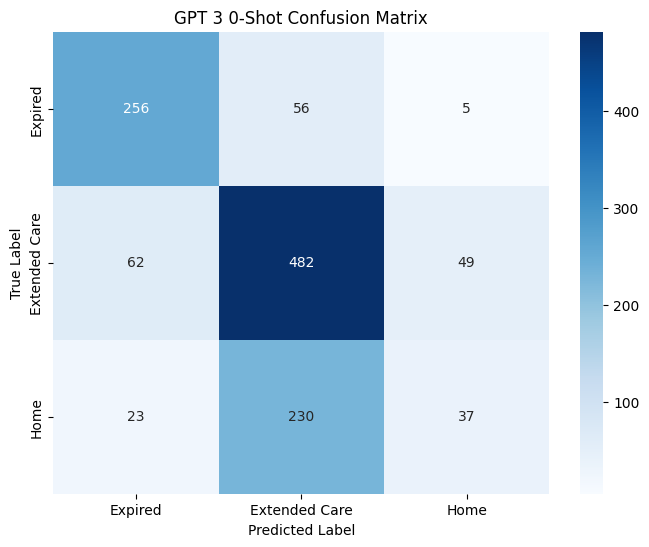

In [ ]:
# Extracting the unique labels
unique_labels_gpt3_0_shot = le_gpt3_0_shot.classes_

def plot_confusion_matrix_3(cm, labels, title='GPT 3 0-Shot Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Plot the confusion matrix
plot_confusion_matrix_3(cm_gpt3_0_shot, unique_labels_gpt3_0_shot)

# GPT 3.5 0-shot with label explaination

In [ ]:
description = 'Home: Patients in this stage are generally free from significant physical or mental health issues. They exhibit normal physiological functions, have a good quality of life, and are not currently experiencing symptoms that require medical attention. Health check-ups may reveal no major abnormalities.' \
              'Extended Care: This stage encompasses individuals who are experiencing symptoms or health issues that necessitate medical attention or care. It can include a wide range of conditions, from minor illnesses to chronic diseases, requiring varying levels of intervention. Patients in this stage may exhibit physical or psychological symptoms, seek medical advice, and undergo diagnostic tests or treatment. The goal is to address and manage their health concerns to improve their overall well-being.'\
              'Expired (Deceased): This stage refers to individuals who have passed away. Death can result from various causes, including illness, injury, or natural processes. Patients in this stage no longer exhibit signs of life.'
description

'Home: Patients in this stage are generally free from significant physical or mental health issues. They exhibit normal physiological functions, have a good quality of life, and are not currently experiencing symptoms that require medical attention. Health check-ups may reveal no major abnormalities.Extended Care: This stage encompasses individuals who are experiencing symptoms or health issues that necessitate medical attention or care. It can include a wide range of conditions, from minor illnesses to chronic diseases, requiring varying levels of intervention. Patients in this stage may exhibit physical or psychological symptoms, seek medical advice, and undergo diagnostic tests or treatment. The goal is to address and manage their health concerns to improve their overall well-being.Expired (Deceased): This stage refers to individuals who have passed away. Death can result from various causes, including illness, injury, or natural processes. Patients in this stage no longer exhibit s

In [ ]:
def create_individual_prompts_0_shot_support(train_texts, train_labels, test_texts,
                                             task_description="Classify the following text into one of the categories: Home, Extended Care, Expired. Answer in 1 single word." + description):
    prompts = []
    unique_labels = train_labels['label'].unique()

    for i in range(len(test_texts)):
        # Creating individual prompt for each test text
        prompt = ''
        prompt += task_description + "\n\n"
        prompt += f"Text: {test_texts.iloc[i]['text']}\nLabel: "
        prompts.append(prompt)

    return prompts

# Generating prompts for each test text
individual_prompt_0_shot_support = create_individual_prompts_0_shot_support(train_texts_df, train_labels_df, test_texts_df)

In [ ]:
# Test the function with an example prompt
example_prompt = individual_prompt_0_shot_support[148]  # Replace with an actual prompt
gpt_output_test = query_gpt3(example_prompt)

print(gpt_output_test)

Extended Care


In [ ]:
# Predict labels using GPT for each prompt and compare with actual labels
predicted_labels_gpt3_0_shot_support = []
for prompt in tqdm(individual_prompt_0_shot_support, desc="Processing prompts"):
    gpt_output = query_gpt3(prompt)
    predicted_labels_gpt3_0_shot_support.append(gpt_output)

Processing prompts:  28%|██▊       | 338/1200 [02:36<06:31,  2.20it/s]

Rate limit reached, waiting to retry...


Processing prompts:  48%|████▊     | 582/1200 [05:10<04:33,  2.26it/s]

Rate limit reached, waiting to retry...


Processing prompts:  57%|█████▋    | 686/1200 [06:24<03:42,  2.31it/s]

Rate limit reached, waiting to retry...


Processing prompts:  66%|██████▌   | 794/1200 [07:38<02:25,  2.79it/s]

Rate limit reached, waiting to retry...


Processing prompts:  77%|███████▋  | 922/1200 [09:03<01:45,  2.63it/s]

Rate limit reached, waiting to retry...


Processing prompts:  88%|████████▊ | 1053/1200 [10:27<01:01,  2.37it/s]

Rate limit reached, waiting to retry...


Processing prompts:  98%|█████████▊| 1176/1200 [11:48<00:09,  2.61it/s]

Rate limit reached, waiting to retry...


Processing prompts: 100%|██████████| 1200/1200 [12:28<00:00,  1.60it/s]


In [ ]:
set(predicted_labels_gpt3_0_shot_support)

{'Expired',
 'Expired.',
 'Expried',
 'Extended Care',
 'Extended Care.',
 'Extended care',
 'Home'}

In [ ]:
processed_predictions_gpt3_0_shot_support = process_predictions(list(test_labels_df['label']), predicted_labels_gpt3_0_shot_support)
set(processed_predictions_gpt3_0_shot_support)

{'Expired', 'Extended Care', 'Home'}

In [ ]:
# Encode labels for metric calculations
le_gpt3_0_shot_support = LabelEncoder()
le_gpt3_0_shot_support.fit(processed_predictions_gpt3_0_shot_support)

encoded_actual_labels_gpt3_0_shot_support = le_gpt3_0_shot_support.transform(list(test_labels_df['label']))
encoded_predicted_labels_gpt3_0_shot_support = le_gpt3_0_shot.transform(processed_predictions_gpt3_0_shot_support)

In [ ]:
# Calculate metrics
cm_gpt3_0_shot_support = confusion_matrix(encoded_actual_labels_gpt3_0_shot_support, encoded_predicted_labels_gpt3_0_shot_support)
accuracy_gpt3_0_shot_support = accuracy_score(encoded_actual_labels_gpt3_0_shot_support, encoded_predicted_labels_gpt3_0_shot_support)
f1_gpt3_0_shot_support = f1_score(encoded_actual_labels_gpt3_0_shot_support, encoded_predicted_labels_gpt3_0_shot_support, average='weighted')
recall_gpt3_0_shot_support = recall_score(encoded_actual_labels_gpt3_0_shot_support, encoded_predicted_labels_gpt3_0_shot_support, average='weighted')
precision_gpt3_0_shot_support = precision_score(encoded_actual_labels_gpt3_0_shot_support, encoded_predicted_labels_gpt3_0_shot_support, average='weighted')

# Print metrics and confusion matrix
print("GPT 3 zero shot (with explainatin) Confusion Matrix:\n", cm_gpt3_0_shot_support)
print("GPT 3 zero shot (with explainatin) Accuracy:", accuracy_gpt3_0_shot_support)
print("GPT 3 zero shot (with explainatin) F1 Score:", f1_gpt3_0_shot_support)
print("GPT 3 zero shot (with explainatin) Recall:", recall_gpt3_0_shot_support)
print("GPT 3 zero shot (with explainatin) Precision:", precision_gpt3_0_shot_support)

GPT 3 zero shot (with explainatin) Confusion Matrix:
 [[249  62   6]
 [ 28 522  43]
 [  5 253  32]]
GPT 3 zero shot (with explainatin) Accuracy: 0.6691666666666667
GPT 3 zero shot (with explainatin) F1 Score: 0.6220897262143995
GPT 3 zero shot (with explainatin) Recall: 0.6691666666666667
GPT 3 zero shot (with explainatin) Precision: 0.6369167612858034


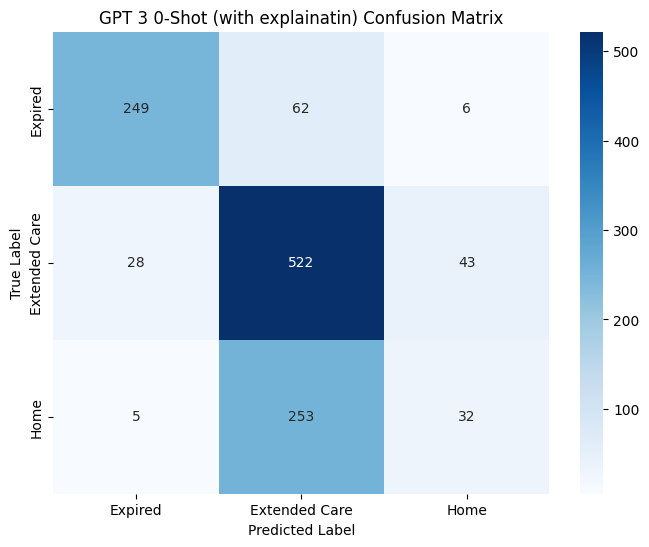

In [ ]:
# Extracting the unique labels
unique_labels_gpt3_0_shot_support = le_gpt3_0_shot_support.classes_

def plot_confusion_matrix_3(cm, labels, title='GPT 3 0-Shot (with explainatin) Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Plot the confusion matrix
plot_confusion_matrix_3(cm_gpt3_0_shot_support, unique_labels_gpt3_0_shot_support)

# Save all predicted results

In [223]:
processed_predictions_gpt3

pred_2_shot = {
    'Prediction': processed_predictions_gpt3
}

# Convert the data into a DataFrame
df1 = pd.DataFrame(pred_2_shot)

# Save the DataFrame to a CSV file
csv_file_path1 = 'two_shot_predict.csv'
df1.to_csv(csv_file_path1, index=False)

In [224]:
processed_predictions_gpt3_3_shot

pred_3_shot = {
    'Prediction': processed_predictions_gpt3_3_shot
}

# Convert the data into a DataFrame
df2 = pd.DataFrame(pred_3_shot)

# Save the DataFrame to a CSV file
csv_file_path2 = 'three_shot_predict.csv'
df2.to_csv(csv_file_path2, index=False)

In [225]:
processed_predictions_gpt3_0_shot

pred_0_shot = {
    'Prediction': processed_predictions_gpt3_0_shot
}

# Convert the data into a DataFrame
df3 = pd.DataFrame(pred_0_shot)

# Save the DataFrame to a CSV file
csv_file_path3 = 'zero_shot_predict.csv'
df3.to_csv(csv_file_path3, index=False)

In [226]:
processed_predictions_gpt3_0_shot_support

pred_0_shot_support = {
    'Prediction': processed_predictions_gpt3_0_shot_support
}

# Convert the data into a DataFrame
df4 = pd.DataFrame(pred_0_shot)

# Save the DataFrame to a CSV file
csv_file_path4 = 'zero_shot_explain_predict.csv'
df4.to_csv(csv_file_path4, index=False)

# Table

In [218]:
import pandas as pd

# Creating a DataFrame to display the results in a table format
results_data = {
    "Model": ["0-Shot Learning (GPT 3.5 Turbo)",
              "0-Shot with Explainatin (GPT 3.5 Turbo)",
              "2-Shot Learning (GPT 3.5 Turbo)",
              "3-Shot Learning (GPT 3.5 Turbo)",
              ],
    "accuracy": [0.6458333333333334, 0.6691666666666667, 0.6883333333333334, 0.6558333333333334],
    "f1": [0.6025096545189891, 0.6220897262143995, 0.6714712805356682, 0.6426353047903893],
    "precision": [0.6067198028645862, 0.6369167612858034, 0.6745971279818891, 0.6381075973913055],
    "recall": [0.6458333333333334, 0.6691666666666667, 0.6883333333333334, 0.6558333333333334],
}

results_df = pd.DataFrame(results_data)
results_df

,Model,accuracy,f1,precision,recall
0,0-Shot Learning (GPT 3.5 Turbo),0.645833,0.602510,0.606720,0.645833
1,0-Shot with Explainatin (GPT 3.5 Turbo),0.669167,0.622090,0.636917,0.669167
2,2-Shot Learning (GPT 3.5 Turbo),0.688333,0.671471,0.674597,0.688333
3,3-Shot Learning (GPT 3.5 Turbo),0.655833,0.642635,0.638108,0.655833


In [227]:
import pandas as pd

# Creating a DataFrame to display the results in a table format
results_data = {
    "Model": ["Basic Baseline (RoBERTa no finetune)",
              "Fancy Baseline (RoBERTa with finetuning)",
              "MedBERT (with fine-tune)",
              "PubMedBERT + Linear Head (with finetuning)",
              "PubMedBERT + LSTM Head (with finetuning)",
              "0-Shot Learning (GPT 3.5 Turbo)",
              "0-Shot Learning with Explainatin (GPT 3.5 Turbo)",
              "2-Shot Learning (GPT 3.5 Turbo)",
              "3-Shot Learning (GPT 3.5 Turbo)",
              ],
    "loss": [1.006448, 0.587303, 0.692040, 0.673323, 0.655659, '-', '-', '-', '-'],
    "accuracy": [0.494167, 0.759167, 0.781667, 0.782500, 0.776667, 0.6458333333333334, 0.6691666666666667, 0.6883333333333334, 0.6558333333333334],
    "f1": [0.326872, 0.759407, 0.782680, 0.782968, 0.777184, 0.6025096545189891, 0.6220897262143995, 0.6714712805356682, 0.6426353047903893],
    "precision": [0.244201, 0.763421, 0.784817, 0.785014, 0.778512, 0.6067198028645862, 0.6369167612858034, 0.6745971279818891, 0.6381075973913055],
    "recall": [0.494167, 0.759167, 0.781667, 0.782500, 0.776667, 0.6458333333333334, 0.6691666666666667, 0.6883333333333334, 0.6558333333333334],
    "epoch": [3.0, 3.0, 3.0, 3.0, 3.0, '-', '-', '-', '-']
}

results_df = pd.DataFrame(results_data)
results_df

,Model,loss,accuracy,f1,precision,recall,epoch
0,Basic Baseline (RoBERTa no finetune),1.006448,0.494167,0.326872,0.244201,0.494167,3.0
1,Fancy Baseline (RoBERTa with finetuning),0.587303,0.759167,0.759407,0.763421,0.759167,3.0
2,MedBERT (with fine-tune),0.69204,0.781667,0.782680,0.784817,0.781667,3.0
3,PubMedBERT + Linear Head (with finetuning),0.673323,0.782500,0.782968,0.785014,0.782500,3.0
4,PubMedBERT + LSTM Head (with finetuning),0.655659,0.776667,0.777184,0.778512,0.776667,3.0
5,0-Shot Learning (GPT 3.5 Turbo),-,0.645833,0.602510,0.606720,0.645833,-
6,0-Shot Learning with Explainatin (GPT 3.5 Turbo),-,0.669167,0.622090,0.636917,0.669167,-
7,2-Shot Learning (GPT 3.5 Turbo),-,0.688333,0.671471,0.674597,0.688333,-
8,3-Shot Learning (GPT 3.5 Turbo),-,0.655833,0.642635,0.638108,0.655833,-
